In [1]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Latex

In [2]:
init_printing(use_latex='mathjax')#(use_latex=True)

In [3]:
def hprint(header, obj):
    display(Latex(r"$" + header +latex(obj)+r"$") )

#### Define a list of parameters

In [4]:
A, B, D_u, D_v, u, v = symbols('A, B, D_u, D_v, u, v', real=True)
k = symbols('k', integer=True)

> The Brusselator PDEs are as follows

<h3><center>$\partial_t u = D_u (\partial_x^2 + \partial_y^2)u + A - (B+1)u + u^2v$</center></h3>

<h3><center>$\partial_t v = D_v (\partial_x^2 + \partial_y^2)v + Bu - u^2 v$</center></h3>
Then, we define kinetic terms as

<h3><center>$f(u,v) = A - (B+1)u + u^2v$</center></h3>
<h3><center>$g(u,v) = Bu - u^2 v$</center></h3>

In [5]:
f = A - (B + 1) * u + u**2 * v
g = B * u - u**2 * v

#### which as a vector, we can define it like

In [6]:
Kinetic = Matrix([[f], [g]])
Kinetic

⎡     2              ⎤
⎢A + u ⋅v - u⋅(B + 1)⎥
⎢                    ⎥
⎢            2       ⎥
⎣     B⋅u - u ⋅v     ⎦

#### First, we find the fix points of the system without diffusion. 

<center>$f(u,v) = A - (B+1)u + u^2v = 0$</center>
<center>$g(u,v) = Bu - u^2 v = 0$</center>

The solution of the above system finds $u^*$ and $v^*$ such that
<center>$f(u^*, v^*) = 0$</center>
<center>$g(u^*, v^*) = 0$</center>
which are

In [7]:
u_star, v_star = solve(Kinetic, (u, v))[0]
hprint("u^* = ", u_star)
hprint("v^* = ", v_star)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### Next, to linearise the PDE system, we find the Jacobian of $(f, g)$ that evaluated at $(u^*, v^*)$ 

In [8]:
J = Kinetic.jacobian([u, v])
hprint("J=", J)
J = J.subs([(u, u_star), (v, v_star)])
hprint("J|_{(u^*, v^*)} =", J)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### And the eigen-values of the resulting matrix in terms of parameters $A$ and $B$ are

In [9]:
lambda_1, lambda_2 =  list(J.eigenvals().keys())
hprint("\lambda_1 = ", lambda_1)
hprint("\lambda_2 = ", lambda_2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### To study the linear stability of the system without diffusion, it is suffice to check the sign of the real part of the largest eigen-value. Since $\lambda_2 < \lambda_1$, we plot  $Re(\lambda_1)$ on $A-B$ domain.

#### Note that we use $\Delta_1 = (A^{2} - 2 A - B + 1) (A^{2} + 2 A - B + 1)$ to find when the eigen-values are complex.

In [10]:
sqrt_delta = lambda_1.as_terms()[1][2]
Delta_1 = list(sqrt_delta.as_powers_dict())[0]
Delta_f = lambdify([A, B],Delta_1, modules='numpy')
hprint("\Delta_1=",Delta_1)

<IPython.core.display.Latex object>

In [11]:
lambda_f = lambdify([A, B],lambda_1, modules='numpy')

In [12]:
L = 5
A_size = 200
B_size = 200
A_domain = L * np.linspace(-1, 1, A_size)
B_domain = L * np.linspace(-1, 1, B_size)
A_val, B_val = np.meshgrid(A_domain, B_domain, sparse=False, indexing="ij")

Note: we first convert the real $A$ and $B$ to complex.

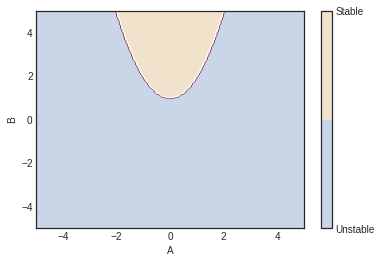

In [13]:
domain = lambda_f(np.complex64(A_val) , np.complex64(B_val))
stable = np.real(domain).copy()
stable[stable < 0] = -1
stable[stable > 0] = 0
plt.style.use('seaborn-white')

plt.contour(A_val, B_val, stable, cmap = 'RdGy',
            levels=[-1,-.5,0], origin='lower')

plt.contourf(A_val, B_val, stable, cmap = 'Pastel2',
            levels=[-1,-.5,0], origin='lower')


#plt.contourf(A_val, B_val, stable, cmap = 'Pastel1')
#plt.imshow(stable, extent=[-5, 5, -5, 5],
#           cmap='RdGy', alpha=0.5)
#plt.contourf(A_val, B_val, stable, cmap = 'Pastel1')
plt.xlabel("A")
plt.ylabel("B")
cbar = plt.colorbar()
cbar.set_ticks([-1, 0])
cbar.set_ticklabels(['Unstable', 'Stable'])
#cbar.set_label('Color Intensity')

plt.grid()
plt.show()

#### Including the diffusion, we find the eigen-values $\lambda_1(k)$ and $\lambda_2(k)$ from

<center>$J_2 = J - D$</center>

In [14]:
J_2 = J - Matrix([[D_u*k**2, 0], [0, D_v*k**2]])
hprint("J_2=", J_2)

<IPython.core.display.Latex object>

In [15]:
lambda_k_1, lambda_k_2 =  list(J_2.eigenvals().keys())
hprint("\lambda_1(k) = ", lambda_k_1)
hprint("\lambda_2(k) = ", lambda_k_2)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [16]:
lambda_k_2.as_ordered_terms()

⎡                              ______________________________________________________________________________________________
⎢  2           2        2     ╱  4      2        2     2      2     2      2    2           2           2           2  4     
⎢-A    B  -Dᵤ⋅k    -Dᵥ⋅k    ╲╱  A  - 2⋅A ⋅B - 2⋅A ⋅Dᵤ⋅k  + 2⋅A ⋅Dᵥ⋅k  - 2⋅A  + B  - 2⋅B⋅Dᵤ⋅k  + 2⋅B⋅Dᵥ⋅k  - 2⋅B + Dᵤ ⋅k  - 2⋅
⎢────, ─, ───────, ───────, ─────────────────────────────────────────────────────────────────────────────────────────────────
⎣ 2    2     2        2                                                                          2                           

__________________________________________      ⎤
       4         2     2  4         2           ⎥
Dᵤ⋅Dᵥ⋅k  + 2⋅Dᵤ⋅k  + Dᵥ ⋅k  - 2⋅Dᵥ⋅k  + 1       ⎥
──────────────────────────────────────────, -1/2⎥
                                                ⎦

In [17]:
t1, t2, t3, t4, t5, t6 = lambda_k_2.as_ordered_terms()
lambda_star = t1+t2+t6
display(lambda_star)
lambda_k_22 = lambda_star + t3 + t4 + t5
lambda_k_22

   2        
  A    B   1
- ── + ─ - ─
  2    2   2

                              _______________________________________________________________________________________________
   2           2       2     ╱  4      2        2     2      2     2      2    2           2           2           2  4      
  A    B   Dᵤ⋅k    Dᵥ⋅k    ╲╱  A  - 2⋅A ⋅B - 2⋅A ⋅Dᵤ⋅k  + 2⋅A ⋅Dᵥ⋅k  - 2⋅A  + B  - 2⋅B⋅Dᵤ⋅k  + 2⋅B⋅Dᵥ⋅k  - 2⋅B + Dᵤ ⋅k  - 2⋅D
- ── + ─ - ───── - ───── + ──────────────────────────────────────────────────────────────────────────────────────────────────
  2    2     2       2                                                                          2                            

_________________________________________    
      4         2     2  4         2         
ᵤ⋅Dᵥ⋅k  + 2⋅Dᵤ⋅k  + Dᵥ ⋅k  - 2⋅Dᵥ⋅k  + 1    1
───────────────────────────────────────── - ─
                                            2

#### Plot the wave-numbers envelope

/usr/local/anaconda3/envs/sympy/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/anaconda3/envs/sympy/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tmp/ipykernel_28350/959912053.py:18: RuntimeWarning: invalid value encountered in sqrt
  kk_c_2_val = np.sqrt(kk_c_2_f(A = 2, B = 3, D_u = 1, D_v = 10))
/usr/local/anaconda3/envs/sympy/lib/python3.10/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


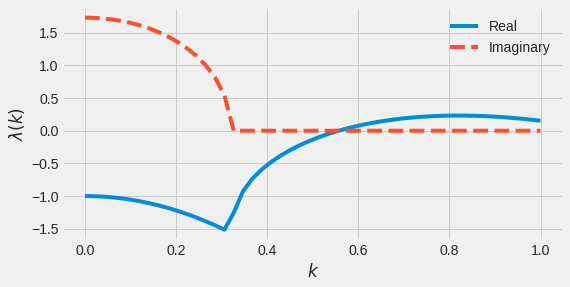

In [147]:
lambda_k_2_f = lambdify([k, A, B, D_u, D_v],lambda_k_2, modules='numpy')

#ks = np.complex64(np.linspace(0.5, 1, num=50))
ks = np.complex64(np.linspace(0, 1, num=50))

k_c_2 = ((B - 1) * D_v - A**2 * D_u)/(2 * D_u * D_v)
k_c_2_f = lambdify([A, B, D_u, D_v], k_c_2, modules='numpy')

kk_c_2 = ((B - 1+ A**2) )/( (D_u - D_v))
kk_c_2_f = lambdify([A, B, D_u, D_v], kk_c_2, modules='numpy')

fig = plt.figure(figsize=(8,4))
plt.style.use('fivethirtyeight')
plt.plot(ks, np.real(lambda_k_2_f(ks, A = 2, B = 3, D_u = 1, D_v = 10)), label='Real')
plt.plot(ks, np.imag(lambda_k_2_f(ks, A = 2, B = 3, D_u = 1, D_v = 10)), '--', label='Imaginary')

#plt.vlines(np.sqrt(k_c_2_f(A = 2, B = 3, D_u = 1, D_v = 10)), 0 , .3)
kk_c_2_val = np.sqrt(kk_c_2_f(A = 2, B = 3, D_u = 1, D_v = 10))
plt.vlines(kk_c_2_val, 0 , np.real(lambda_k_2_f(kk_c_2_val, A = 2, B = 3, D_u = 1, D_v = 10)))
plt.xlabel(r"$k$")
plt.ylabel(r"$\lambda(k)$")
plt.legend()
#plt.grid()
plt.show()

#### Finding the maximum of $\lambda_2(k)$, namely $k_c$ as the dominant wave-number

In [136]:
kk_c_2 = ((B - 1+ A**2) )/( (D_u - D_v))
kk_c_2_f = lambdify([A, B, D_u, D_v], kk_c_2, modules='numpy')

k_2 = symbols('k_2')
Delta_k_2 = factor((lambda_k_2.as_terms()[1][5]**2).subs(k**2, k_2))
display(Delta_k_2)
Delta_k_2_f = lambdify([k_2, A, B, D_u, D_v], Delta_k_2, modules='numpy')
Delta_k_2_prime = Delta_k_2.diff(k_2)
display(factor(Delta_k_2_prime))
Delta_k_2_prime_f = lambdify([k_2, A, B, D_u, D_v], Delta_k_2_prime, modules='numpy')

 4      2        2            2            2    2                                   2   2             2               2   2  
A  - 2⋅A ⋅B - 2⋅A ⋅Dᵤ⋅k₂ + 2⋅A ⋅Dᵥ⋅k₂ - 2⋅A  + B  - 2⋅B⋅Dᵤ⋅k₂ + 2⋅B⋅Dᵥ⋅k₂ - 2⋅B + Dᵤ ⋅k₂  - 2⋅Dᵤ⋅Dᵥ⋅k₂  + 2⋅Dᵤ⋅k₂ + Dᵥ ⋅k₂  -

            
 2⋅Dᵥ⋅k₂ + 1

             ⎛ 2                        ⎞
-2⋅(Dᵤ - Dᵥ)⋅⎝A  + B - Dᵤ⋅k₂ + Dᵥ⋅k₂ - 1⎠

In [137]:
kk_c_2_val = kk_c_2_f(A = 2, B = 3, D_u = 1, D_v = 10)
print(kk_c_2_val)
print(Delta_k_2_prime_f(kk_c_2_val, A = 2, B = 3, D_u = 1, D_v = 10))
print(Delta_k_2_f(kk_c_2_val, A = 2, B = 3, D_u = 1, D_v = 10))

-0.6666666666666666
2.842170943040401e-14
-48.0


In [150]:
tr_k = B-1-A**2- (D_u + D_v) * k**2
tr_k_f = lambdify([k, A, B, D_u, D_v], tr_k, modules='numpy')

/usr/local/anaconda3/envs/sympy/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/anaconda3/envs/sympy/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/anaconda3/envs/sympy/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


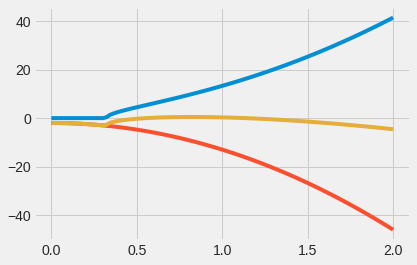

In [156]:
ks = np.complex64(np.linspace(0, 2, num=100))
plt.plot(ks, np.sqrt(Delta_k_2_f(ks**2, A = 2, B = 3, D_u = 1, D_v = 10)))
plt.plot(ks, tr_k_f(ks, A = 2, B = 3, D_u = 1, D_v = 10))
plt.plot(ks, tr_k_f(ks, A = 2, B = 3, D_u = 1, D_v = 10) + np.sqrt(Delta_k_2_f(ks**2, A = 2, B = 3, D_u = 1, D_v = 10)))

In [19]:
solveset(lambda_k_2.diff(k), k)

⎧          ___________________________________________________________________________________________        _______________
⎪         ╱      2                   _________          _________                                            ╱      2        
⎪        ╱      A ⋅Dᵤ⋅Dᵥ      A⋅Dᵤ⋅╲╱ B⋅Dᵤ⋅Dᵥ    A⋅Dᵥ⋅╲╱ B⋅Dᵤ⋅Dᵥ        B⋅Dᵤ⋅Dᵥ            Dᵤ⋅Dᵥ            ╱      A ⋅Dᵤ⋅Dᵥ  
⎨0, -   ╱   ─────────────── - ──────────────── - ──────────────── + ─────────────── - ─────────────── ,    ╱   ──────────────
⎪      ╱      2           2     2           2      2           2      2           2     2           2     ╱      2           
⎪    ╲╱     Dᵤ ⋅Dᵥ - Dᵤ⋅Dᵥ    Dᵤ ⋅Dᵥ - Dᵤ⋅Dᵥ     Dᵤ ⋅Dᵥ - Dᵤ⋅Dᵥ     Dᵤ ⋅Dᵥ - Dᵤ⋅Dᵥ    Dᵤ ⋅Dᵥ - Dᵤ⋅Dᵥ    ╲╱     Dᵤ ⋅Dᵥ - Dᵤ⋅Dᵥ
⎩                                                                                                                            

____________________________________________________________________________         ________________________________

In [29]:
lambda_k_2.diff(k)#.subs(k, sqrt( ((B-1)*D_v - A**2 * D_u)/(2*D_u*D_v) ))

ValueError: 
Can't calculate derivative wrt k**2.

In [40]:
lambda_k_2.subs(k, sqrt(k_c_2))

                  ___________________________________________________________________________________________________________
                 ╱                                                                                                           
                ╱                        2 ⎛   2                ⎞    2 ⎛   2                ⎞                ⎛   2           
               ╱    4      2        2   A ⋅⎝- A ⋅Dᵤ + Dᵥ⋅(B - 1)⎠   A ⋅⎝- A ⋅Dᵤ + Dᵥ⋅(B - 1)⎠    2         B⋅⎝- A ⋅Dᵤ + Dᵥ⋅(B
              ╱    A  - 2⋅A ⋅B - 2⋅A  - ───────────────────────── + ───────────────────────── + B  - 2⋅B - ──────────────────
   2         ╱                                      Dᵥ                          Dᵤ                                    Dᵥ     
  A    B   ╲╱                                                                                                                
- ── + ─ + ───────────────────────────────────────────────────────────────────────────────────────────────────────────

In [27]:
ppp = simplify(lambda_k_2.diff(k).subs(k, sqrt(k_c_2)))
ppp_f = lambdify([A, B, D_u, D_v], ppp, modules='numpy')

In [28]:
ppp_f(A = 2, B = 3, D_u = 1, D_v = 10)

-0.3814910949350241

In [39]:
k_2 = symbols('k_2')
lambda_k2_2 = lambda_k_2.subs(k**2, k_2 )
display(lambda_k2_2)
lambda_k2_2.diff(k_2).subs(k_2, k_c_2)

                              _______________________________________________________________________________________________
   2                         ╱  4      2        2            2            2    2                                   2   2     
  A    B   Dᵤ⋅k₂   Dᵥ⋅k₂   ╲╱  A  - 2⋅A ⋅B - 2⋅A ⋅Dᵤ⋅k₂ + 2⋅A ⋅Dᵥ⋅k₂ - 2⋅A  + B  - 2⋅B⋅Dᵤ⋅k₂ + 2⋅B⋅Dᵥ⋅k₂ - 2⋅B + Dᵤ ⋅k₂  - 2⋅
- ── + ─ - ───── - ───── + ──────────────────────────────────────────────────────────────────────────────────────────────────
  2    2     2       2                                                                           2                           

____________________________________________    
        2               2   2                   
Dᵤ⋅Dᵥ⋅k₂  + 2⋅Dᵤ⋅k₂ + Dᵥ ⋅k₂  - 2⋅Dᵥ⋅k₂ + 1    1
──────────────────────────────────────────── - ─
                                               2

                                                                                                                             
                                                                                                       2                     
                                                                                                      A ⋅Dᵥ - B⋅Dᵤ + B⋅Dᵥ + D
  Dᵤ   Dᵥ                                                                                                                    
- ── - ── + ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  2    2             ________________________________________________________________________________________________________
                    ╱                                                                                                        
                   ╱                        2 ⎛   2                ⎞    2 ⎛   2                ⎞                ⎛   2 

In [78]:
llll = lambda_k2_2.diff(k_2)
llll

                                                    2       2                      2                          2              
  Dᵤ   Dᵥ                                        - A ⋅Dᵤ + A ⋅Dᵥ - B⋅Dᵤ + B⋅Dᵥ + Dᵤ ⋅k₂ - 2⋅Dᵤ⋅Dᵥ⋅k₂ + Dᵤ + Dᵥ ⋅k₂ - Dᵥ      
- ── - ── + ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  2    2         ____________________________________________________________________________________________________________
                ╱  4      2        2            2            2    2                                   2   2             2    
            2⋅╲╱  A  - 2⋅A ⋅B - 2⋅A ⋅Dᵤ⋅k₂ + 2⋅A ⋅Dᵥ⋅k₂ - 2⋅A  + B  - 2⋅B⋅Dᵤ⋅k₂ + 2⋅B⋅Dᵥ⋅k₂ - 2⋅B + Dᵤ ⋅k₂  - 2⋅Dᵤ⋅Dᵥ⋅k₂  + 2

                               
                               
───────────────────────────────
_______________________________
           2   2               
⋅Dᵤ⋅k₂ + Dᵥ ⋅k₂  - 2⋅Dᵥ⋅k₂ + 1 

In [79]:
llll2 = llll.as_ordered_terms()[2]#.as_ordered_terms()
llll2

                                        2       2                      2                          2                          
                                     - A ⋅Dᵤ + A ⋅Dᵥ - B⋅Dᵤ + B⋅Dᵥ + Dᵤ ⋅k₂ - 2⋅Dᵤ⋅Dᵥ⋅k₂ + Dᵤ + Dᵥ ⋅k₂ - Dᵥ                  
─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     ________________________________________________________________________________________________________________________
    ╱  4      2        2            2            2    2                                   2   2             2               2
2⋅╲╱  A  - 2⋅A ⋅B - 2⋅A ⋅Dᵤ⋅k₂ + 2⋅A ⋅Dᵥ⋅k₂ - 2⋅A  + B  - 2⋅B⋅Dᵤ⋅k₂ + 2⋅B⋅Dᵥ⋅k₂ - 2⋅B + Dᵤ ⋅k₂  - 2⋅Dᵤ⋅Dᵥ⋅k₂  + 2⋅Dᵤ⋅k₂ + Dᵥ 

                   
                   
───────────────────
___________________
   2               
⋅k₂  - 2⋅Dᵥ⋅k₂ + 1 

In [57]:
llll.as_terms()[2]

IndexError: tuple index out of range

In [81]:
factor(llll.as_terms()[1][2]).subs(k_2, k_c_2)

           ⎛                2                      2                ⎞
           ⎜ 2           - A ⋅Dᵤ + Dᵥ⋅(B - 1)   - A ⋅Dᵤ + Dᵥ⋅(B - 1)⎟
-(Dᵤ - Dᵥ)⋅⎜A  + B - 1 - ──────────────────── + ────────────────────⎟
           ⎝                     2⋅Dᵥ                   2⋅Dᵤ        ⎠

In [82]:
simplify(factor(llll.as_terms()[1][2]).subs(k_2, k_c_2))

   2   3    2      2       2          3     2        3
- A ⋅Dᵤ  + A ⋅Dᵤ⋅Dᵥ  - B⋅Dᵤ ⋅Dᵥ + B⋅Dᵥ  + Dᵤ ⋅Dᵥ - Dᵥ 
──────────────────────────────────────────────────────
                       2⋅Dᵤ⋅Dᵥ                        

In [64]:
llll.as_terms()[1][2]

   2       2                      2                          2        
- A ⋅Dᵤ + A ⋅Dᵥ - B⋅Dᵤ + B⋅Dᵥ + Dᵤ ⋅k₂ - 2⋅Dᵤ⋅Dᵥ⋅k₂ + Dᵤ + Dᵥ ⋅k₂ - Dᵥ

In [72]:
k_c_2

   2                
- A ⋅Dᵤ + Dᵥ⋅(B - 1)
────────────────────
      2⋅Dᵤ⋅Dᵥ       

In [77]:
X_1 = (B-1-A**2-k_c_2*(D_u + D_v))/2
simplify(X_1**2 - A**2 )

                                                          2
       ⎛ 2   2    2                       2             2⎞ 
   2   ⎝A ⋅Dᵤ  - A ⋅Dᵤ⋅Dᵥ + B⋅Dᵤ⋅Dᵥ - B⋅Dᵥ  - Dᵤ⋅Dᵥ + Dᵥ ⎠ 
- A  + ────────────────────────────────────────────────────
                                 2   2                     
                            16⋅Dᵤ ⋅Dᵥ                      